die ersten 2 blocks kannst du weglassen

In [14]:
import numpy as np
import os
from skimage.io import imread
from glob import glob
import sys


# Current folder as project_root
# Going three layers of folders upwards to src
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_dir      = os.path.join(project_root)

# Add the src directory to the Python module search path
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

# Import functions for loading images
from src.imread_all import load_nih3t3_images, load_n2dl_hela_images, load_n2dh_gowt1_images


# Load images and ground-truth masks from the datasets
imgs_N2DH_GOWT1, gts_N2DH_GOWT1, img_paths_N2DH_GOWT1, gt_paths_N2DH_GOWT1 = load_n2dh_gowt1_images(base_path=os.path.join(project_root, "data-git", "N2DH-GOWT1"))
imgs_N2DL_HeLa, gts_N2DL_HeLa, img_paths_N2DL_HeLa, gt_paths_N2DL_HeLa = load_n2dl_hela_images(base_path=os.path.join(project_root, "data-git", "N2DL-HeLa"))
imgs_NIH3T3, gts_NIH3T3, img_paths_NIH3T3, gt_paths_NIH3T3 = load_nih3t3_images(base_path=os.path.join(project_root, "data-git", "NIH3T3"))



In [16]:
from src.Dice_Score_comparison import calculate_dice_scores_global
from src.show_imgs import plot_images_fixed_size
from src.find_image import find_and_load_image
from src.pre_processing import gammacorrection

img_gowt1 = imread((os.path.join(project_root,"data-git","N2DH-GOWT1", "img", "t01.tif")), as_gray=True)

# Compute Dice scores for each dataset
dice_all_gowt1_global = calculate_dice_scores_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)
dice_all_hela_global = calculate_dice_scores_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_all_nih_global = calculate_dice_scores_global(imgs_NIH3T3, gts_NIH3T3)

# Convert numpy floats to plain Python floats for clearer output
dice_all_gowt1_global = [float(score) for score in dice_all_gowt1_global]
dice_all_hela_global = [float(score) for score in dice_all_hela_global]
dice_all_nih_global = [float(score) for score in dice_all_nih_global]

# vector with all Dice scores with our Otsu Global
dice_all_global = dice_all_gowt1_global + dice_all_hela_global + dice_all_nih_global

GAMMA

one of our methods etc. 
equation: 
here an example of what it does:

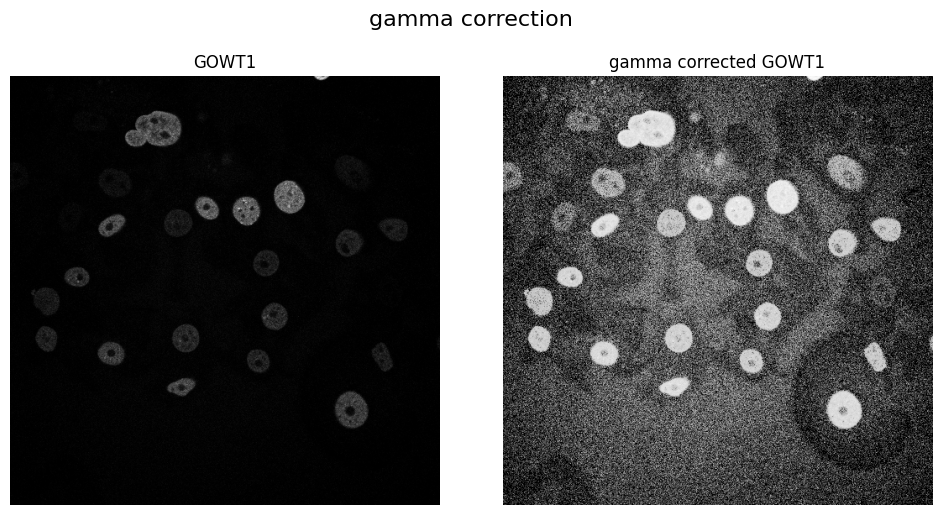

In [17]:
#-----------------
# GAMMA CORRECTION
#-----------------

img_gowt1_gamma = gammacorrection(img_gowt1)

images_img = [img_gowt1, img_gowt1_gamma]
titles_img = ["GOWT1", "gamma corrected GOWT1"]

plot_images_fixed_size(images_img, titles=titles_img, main_title="gamma correction")

When applied before segmentation can strongly enhance performance. To quantify gamma was applied on all images...all dice score were calculated..

In [ ]:


# import function for gamma correction + global otsu thresholding + dice score calculation
from src.Dice_Score_comparison import calculate_dice_scores_gamma_global

# apply gamma correction and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_gamma_global = calculate_dice_scores_gamma_global(imgs=imgs_NIH3T3, gts=gts_NIH3T3)
dice_scores_N2DL_HeLa_gamma_global = calculate_dice_scores_gamma_global(imgs=imgs_N2DL_HeLa, gts=gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_gamma_global = calculate_dice_scores_gamma_global(imgs=imgs_N2DH_GOWT1, gts=gts_N2DH_GOWT1)

# vector with all dice score of gamma correction + global otsu thresholding
all_dice_scores_gamma_global =  dice_scores_N2DH_GOWT1_gamma_global + dice_scores_N2DL_HeLa_gamma_global + dice_scores_NIH3T3_gamma_global 



here you see how much better with gamma....

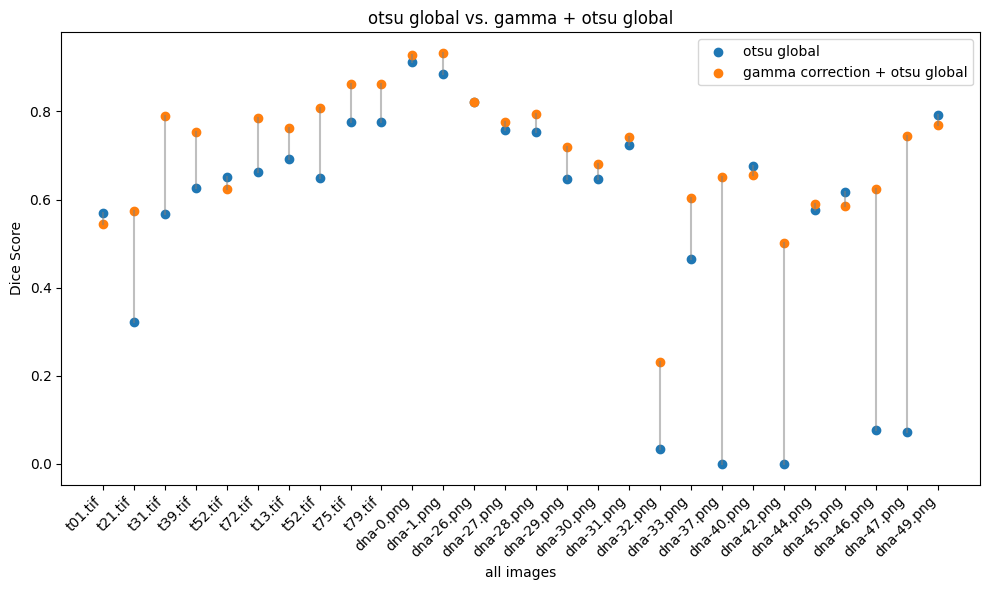

In [5]:
from src.Plots import plot_pairwise_scores

# Spaghetti plot gamma correction + otsu global
# Datasets
labels = [
    't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif',  # N2DH-GOWT1
    't13.tif', 't52.tif', 't75.tif', 't79.tif',                        # N2DL-HeLa
    'dna-0.png', 'dna-1.png', 'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png'                                        # NIH3T3
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))

plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_gamma_global, 
                     labels=labels, 
                     title= "otsu global vs. gamma + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "gamma correction + otsu global")  )